In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

9220
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import kin1d1d as kin
path_ = "../simulations/KIN1D1D/"
path_test_ = "../simulations/test-simplified/"

path_cl_ = "../results/KIN1D1D-results/"

In [7]:
# ---------------------------------------------------------------
# --- Read the matrix ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)
mix.reload_module(kin)

# dd_NH_orig = qucf.read_matrix(path_, "archive/flat_NH-orig_OUTPUT.hdf5")

print("--- Quantum data ---")
dd_33 = qucf_r.read_matrix(path_, "flat_33_OUTPUT.hdf5") #  nx = 3, nv = 3

print("--- Quantum data ---")
dd_34 = qucf_r.read_matrix(path_, "flat_34_OUTPUT.hdf5") #  nx = 3, nv = 4

print()
dd_44     = qucf_r.read_matrix(path_, "flat_44_OUTPUT.hdf5")      # nv = 4, nx = 4 (D-matrix)

print()
# dd_55 = qucf_r.read_matrix(path_, "flat_55_OUTPUT.hdf5") #  nx = 5, nv = 5

print("\n --- Classical data ---")
cl_33 = kin.read_matrix(path_cl_, "out_3_3_w1.2_Lx100_Lv4_flat.hdf5")
cl_44 = kin.read_matrix(path_cl_, "out_4_4_w1.2_Lx100_Lv4_flat.hdf5")
# cl_55 = kin.read_matrix(path_cl_, "out_5_5_w1.2_Lx100_Lv4_flat.hdf5")

--- Quantum data ---
Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE
N = 128
--- Quantum data ---
Reading the matrix from: flat_34_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 09:53:58
matrix name:  U_BE
N = 256

Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512


 --- Classical data ---
date of the simulation:  06-22-2023 15:48:52
N, Nx, Nv = 128, 8, 8
date of the simulation:  06-06-2023 16:39:51
N, Nx, Nv = 512, 16, 16


<IPython.core.display.Javascript object>


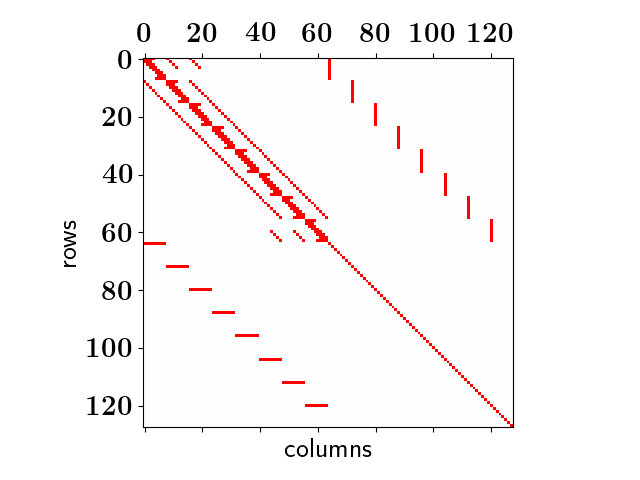

In [9]:
# ---------------------------------------------------------------
# --- Plot the mask ---
# ---------------------------------------------------------------
mix.reload_module(qucf_r)

# dd_work = dict(dd_NH_orig)
dd_work = dict(dd_33)

# --- Print the mask ---
figA_mask = qucf_r.plot_matrix(dd_work["A-mask"], fontsize = 20, cmap = "bwr")
# figA_mask_cc = qucf_r.plot_matrix(dd_work["A-mask-cc"], fontsize = 20, cmap = "bwr")

# --- Print the D matrix ---
# figA = qucf_r.plot_matrix(dd_work["A"], fontsize = 20, cmap = "bwr")

del dd_work

In [44]:
# ---------------------------------------------------------------
# --- Function to print matrix subblocks ---
# ---------------------------------------------------------------
mix.reload_module(mix)
def print_submatrix(dd, coef = 1, i_shift = 0, flag_imag = False):
    d = 1./np.sqrt(2)
    nx, nv = dd["regs"]["rx"], dd["regs"]["rv"]
    Nx, Nv = 1<<dd["regs"]["rx"], 1<<dd["regs"]["rv"]
    
    print("\n")
    print("****** Nx, Nv: {:d}, {:d} *************************************".format(Nx, Nv))
    
    max_val = np.max(np.max(np.abs(dd["A"])))
    print("max|A|: {:0.3e}".format(max_val))
    
    min_val = np.min(np.min(np.abs(dd["A"][np.nonzero(dd["A"])])))
    print("min|A|: {:0.3e}".format(min_val))
    
    
    ir_x, ic_x = 0, 0 # x[0], diag
#     ir_x, ic_x = 0, 1 # V-f: x[0], diag+1
#     ir_x, ic_x = 0, 2 # V-f: x[0], diag+2
#     ir_x, ic_x = 0, 3 # V-f: x[0], diag+3

#     ir_x, ic_x = 1, 0 # V-f: x[1], diag-1
#     ir_x, ic_x = 1, 1 # V-f: x[1], diag
#     ir_x, ic_x = 1, 2 # V-f: x[1], diag+1
#     ir_x, ic_x = 1, 3 # V-f: x[1], diag+2

#     ir_x, ic_x = 2, 1 # V-f: x[1], diag-1
#     ir_x, ic_x = 2, 2 # V-f: x[1], diag
#     ir_x, ic_x = 2, 3 # V-f: x[1], diag+1

#     ir_x, ic_x = 3, 2 # V-f: x[1], diag-1
#     ir_x, ic_x = 3, 3 # V-f: x[1], diag
#     ir_x, ic_x = 3, 4 # V-f: x[1], diag+1

#     ir_x, ic_x = Nx-1, Nx-4 # V-f: x[1], diag-3
#     ir_x, ic_x = Nx-1, Nx-3 # V-f: x[1], diag-2
#     ir_x, ic_x = Nx-1, Nx-2 # V-f: x[1], diag-1
#     ir_x, ic_x = Nx-1, Nx-1 # V-f: x[1], diag


#    ir_x, ic_x = 0, Nx # V-E: x[0], diag
#     ir_x, ic_x = 1, Nx+1 # V-E: x[1], diag
    
#     ir_x, ic_x = Nx, 0 # A-f: x[0], diag
#     ir_x, ic_x = Nx+1, 1 # A-f: x[1], diag
    
#     ir_x, ic_x = Nx, Nx # A-E: x[0], diag
#     ir_x, ic_x = Nx+4, Nx+4 # A-E: x[4], diag
    
    # --------------------------------------------------
    Nr_print, Nc_print = Nv//coef, Nv//coef
    ir_start, ic_start = Nv * ir_x + i_shift*Nr_print, Nv * ic_x + i_shift*Nc_print
    
    print("ir-start, ir-end: {:d}, {:d}".format(ir_start, ir_start + Nr_print))
    print("ic-start, ic-end: {:d}, {:d}".format(ic_start, ic_start + Nc_print))
    
    print()
    print("d**(nv+2): {:0.3f}".format(d**(nv+2)) )
    
    print(d**7)
    print(d**8)
    print(d**9)
    print(d**10)

    print("-------------------------- Real part -----------------------------------------")
    mix.print_subblock_colored(
        dd["A-real"], 
        ir_start, ic_start,
        Nr_print, Nc_print,
        ff=[6, 3, "f"], 
        n_in_row = Nc_print, 
        gap_be = " ", 
        sep_r = Nv, 
        sep_c = Nv
    )

    if(flag_imag):
        print("\n\n-------------------------- Imag part -----------------------------------------")
        mix.print_subblock_colored(
            dd["A-imag"], 
            ir_start, ic_start,
            Nr_print, Nc_print,
            ff=[6, 3, "f"], 
            n_in_row = Nc_print, 
            gap_be = " ", 
            sep_r = Nv, 
            sep_c = Nv
        ) 

In [42]:
# ---------------------------------------------------------
# --- Print the matrix D ---
# ---------------------------------------------------------
print()
print_submatrix(dd_44) 
print()
print_submatrix(dd_55) 




****** Nx, Nv: 16, 16 *************************************
max|A|: 1.000e+00
min|A|: 8.798e-03
ir-start, ir-end: 240, 256
ic-start, ic-end: 192, 208

d**(nv+2): 0.125
0.08838834764831839
0.06249999999999996
0.04419417382415918
0.031249999999999972
-------------------------- Real part -----------------------------------------
--- 0:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00

In [46]:
# ---------------------------------------------------------
# --- Print the classical matrix ---
# ---------------------------------------------------------
print_submatrix(cl_44, flag_imag = True) 
print_submatrix(cl_55, flag_imag = True) 



****** Nx, Nv: 16, 16 *************************************
max|A|: 4.000e+00
min|A|: 2.855e-04
ir-start, ir-end: 0, 16
ic-start, ic-end: 0, 16

d**(nv+2): 0.125
0.08838834764831839
0.06249999999999996
0.04419417382415918
0.031249999999999972
-------------------------- Real part -----------------------------------------
--- 0:  -0.886 -0.035  0.028 -0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 1:   0.007 -0.794  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 2:   0.000  0.007 -0.674  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 3:   0.000  0.000  0.007 -0.554  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 4:   0.000  0.000  0.000  0.007 -0.434  0.007  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
--- 5:   0.000  0.000  0.000  0.000  0.007 -0.314  0.007  0.000  0.000  0.00